# Exploratory Data Analysis - Price of Healthy Diet

## 1. Load Libraries and Data

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("../data/raw/price_of_healthy_diet_clean.csv")

## 2. EDA


##### 2.1 General Overview

In [8]:
data.head()

,country_code,country,region,year,cost_healthy_diet_ppp_usd,annual_cost_healthy_diet_usd,cost_vegetables_ppp_usd,cost_fruits_ppp_usd,total_food_components_cost,cost_category,data_quality
0,8,Albania,Africa,2017,3.04,1109.60,NaN,NaN,NaN,High Cost,Estimated value
1,8,Albania,Africa,2018,3.13,1142.45,NaN,NaN,NaN,High Cost,Estimated value
2,8,Albania,Africa,2019,3.32,1211.80,NaN,NaN,NaN,High Cost,Estimated value
3,8,Albania,Africa,2020,3.40,1241.00,NaN,NaN,NaN,High Cost,Estimated value
4,8,Albania,Africa,2021,3.49,1273.85,0.6,0.77,1.37,High Cost,Estimated value


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1379 entries, 0 to 1378
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country_code                  1379 non-null   int64  
 1   country                       1379 non-null   object 
 2   region                        1379 non-null   object 
 3   year                          1379 non-null   int64  
 4   cost_healthy_diet_ppp_usd     1379 non-null   float64
 5   annual_cost_healthy_diet_usd  1379 non-null   float64
 6   cost_vegetables_ppp_usd       166 non-null    float64
 7   cost_fruits_ppp_usd           166 non-null    float64
 8   total_food_components_cost    166 non-null    float64
 9   cost_category                 1368 non-null   object 
 10  data_quality                  1379 non-null   object 
dtypes: float64(5), int64(2), object(4)
memory usage: 118.6+ KB


In [24]:
null_summary = pd.DataFrame({
    "Data Type": data.dtypes,
    "Missing Count": data.isnull().sum(),
    "Missing %": (data.isnull().mean() * 100)
})

null_summary = null_summary.sort_values("Missing Count", ascending=False)

null_summary


,Data Type,Missing Count,Missing %
cost_vegetables_ppp_usd,float64,1213,87.962292
cost_fruits_ppp_usd,float64,1213,87.962292
total_food_components_cost,float64,1213,87.962292
cost_category,object,11,0.797679
country_code,int64,0,0.000000
country,object,0,0.000000
region,object,0,0.000000
year,int64,0,0.000000
cost_healthy_diet_ppp_usd,float64,0,0.000000
annual_cost_healthy_diet_usd,float64,0,0.000000


In [16]:
# Numeric columns
numeric_cols = data.select_dtypes(include=["int64", "float64"]).columns

# Categorical columns
categorical_cols = data.select_dtypes(include=["object", "category"]).columns

print("Numeric Columns:")
print(numeric_cols)

print("\nCategorical Columns:")
print(categorical_cols)


Numeric Columns:
Index(['country_code', 'year', 'cost_healthy_diet_ppp_usd',
       'annual_cost_healthy_diet_usd', 'cost_vegetables_ppp_usd',
       'cost_fruits_ppp_usd', 'total_food_components_cost'],
      dtype='object')

Categorical Columns:
Index(['country', 'region', 'cost_category', 'data_quality'], dtype='object')


In [17]:
# Numeric summary
display(data[numeric_cols].describe())

# Categorical summary
display(data[categorical_cols].describe())


,country_code,year,cost_healthy_diet_ppp_usd,annual_cost_healthy_diet_usd,cost_vegetables_ppp_usd,cost_fruits_ppp_usd,total_food_components_cost
count,1379.000000,1379.000000,1379.000000,1379.000000,166.000000,166.000000,166.000000
mean,420.996374,2020.490210,3.677411,1342.255076,0.762711,0.675361,1.438072
std,248.244476,2.293522,0.899691,328.387152,0.293952,0.299848,0.496151
min,8.000000,2017.000000,1.700000,620.500000,0.210000,0.170000,0.380000
25%,203.000000,2018.000000,3.010000,1098.650000,0.532500,0.450000,1.142500
50%,417.000000,2020.000000,3.550000,1295.750000,0.740000,0.660000,1.440000
75%,642.500000,2022.000000,4.205000,1534.825000,0.937500,0.827500,1.667500
max,894.000000,2024.000000,8.390000,3062.350000,1.690000,2.500000,3.400000


,country,region,cost_category,data_quality
count,1379,1379,1368,1379
unique,175,4,2,1
top,Albania,Europe,High Cost,Estimated value
freq,8,409,1160,1379


#### 2.2 Numerical Feature Analysis

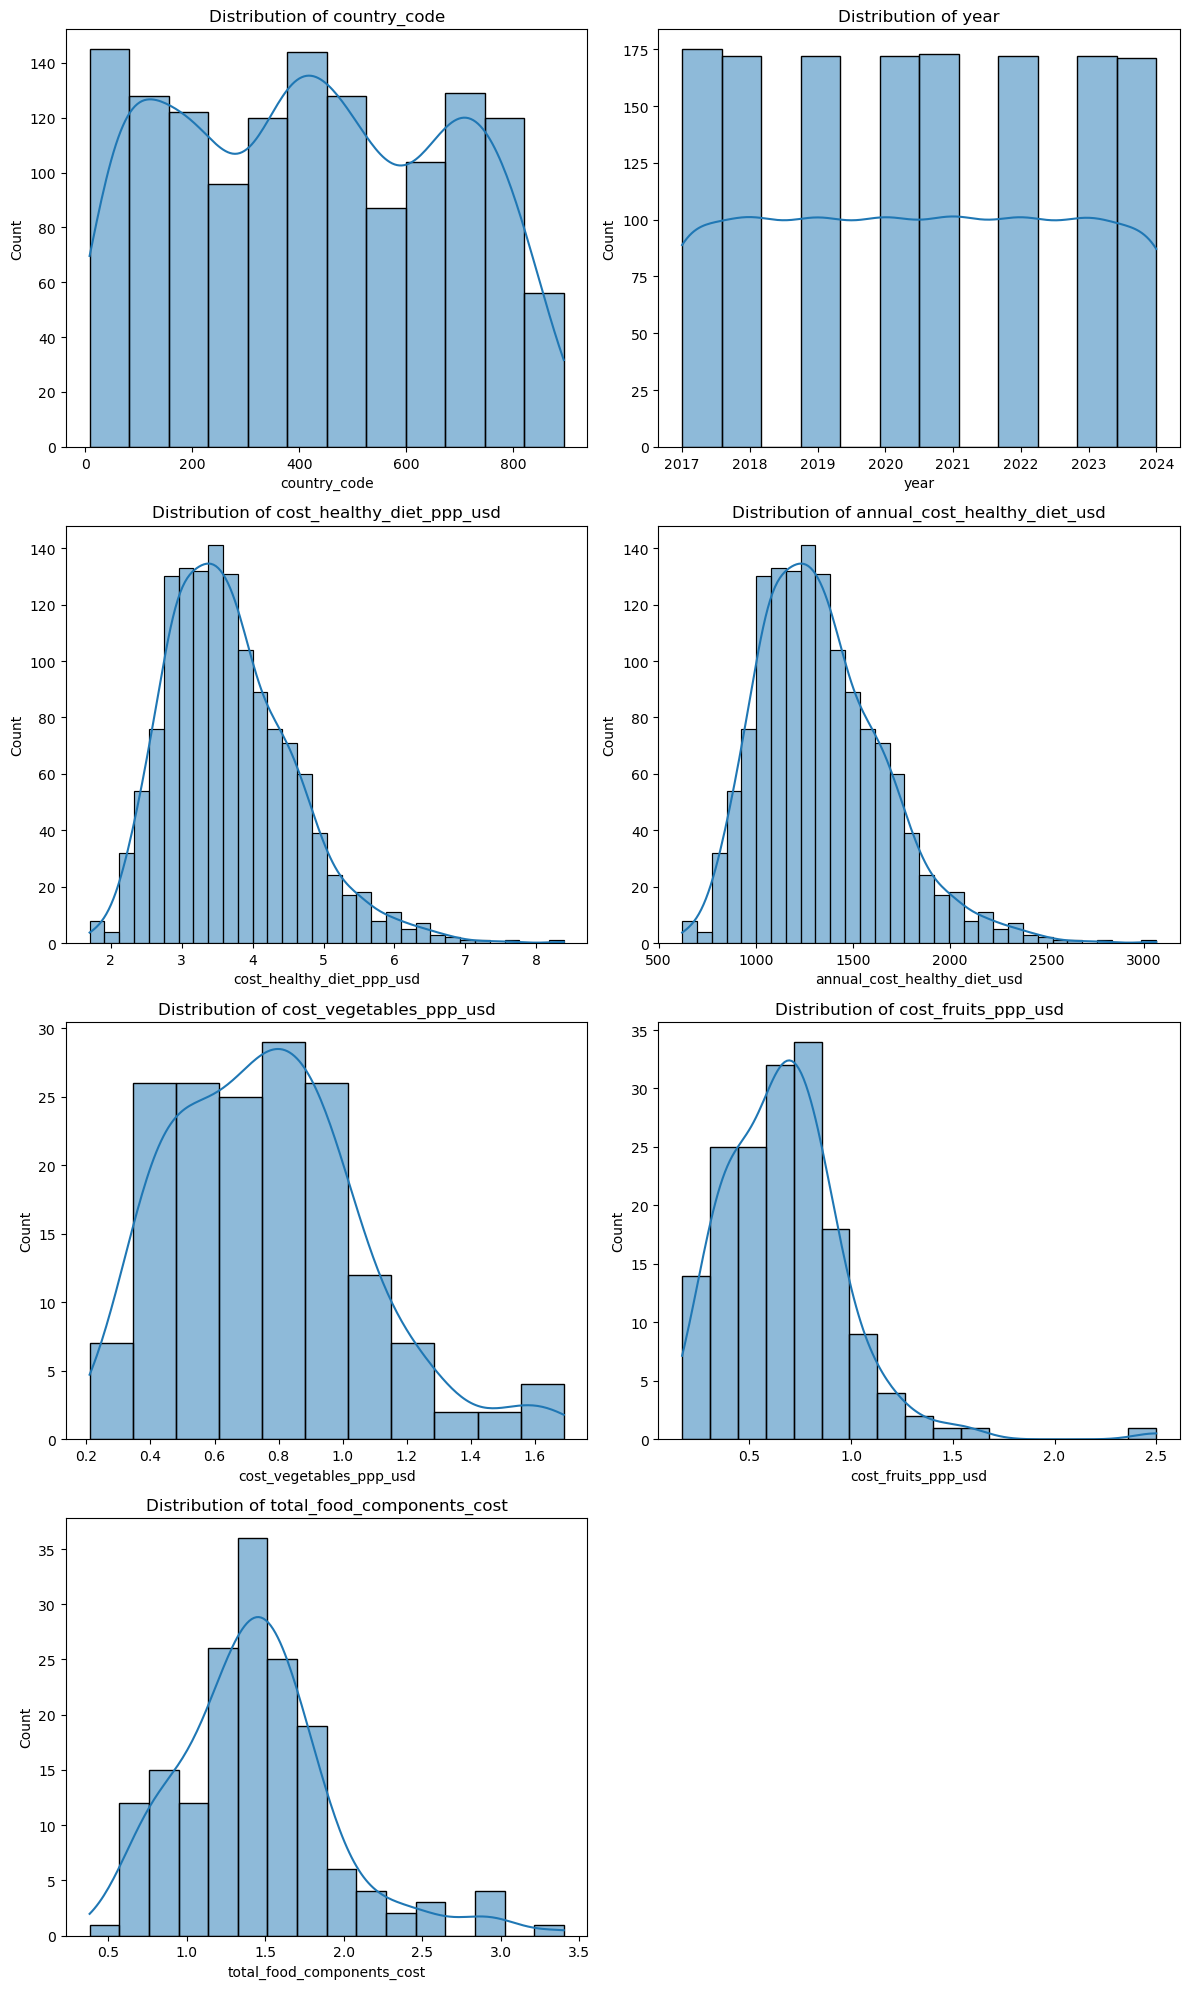

In [ ]:


num_cols = len(numeric_cols)
cols = 2
rows = (num_cols // cols) + (num_cols % cols)

fig, axes = plt.subplots(rows, cols, figsize=(12, 5*rows))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.histplot(data[col], kde=True, ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")

# Remove empty subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


#### 2.3 Categorical Feature Analysis

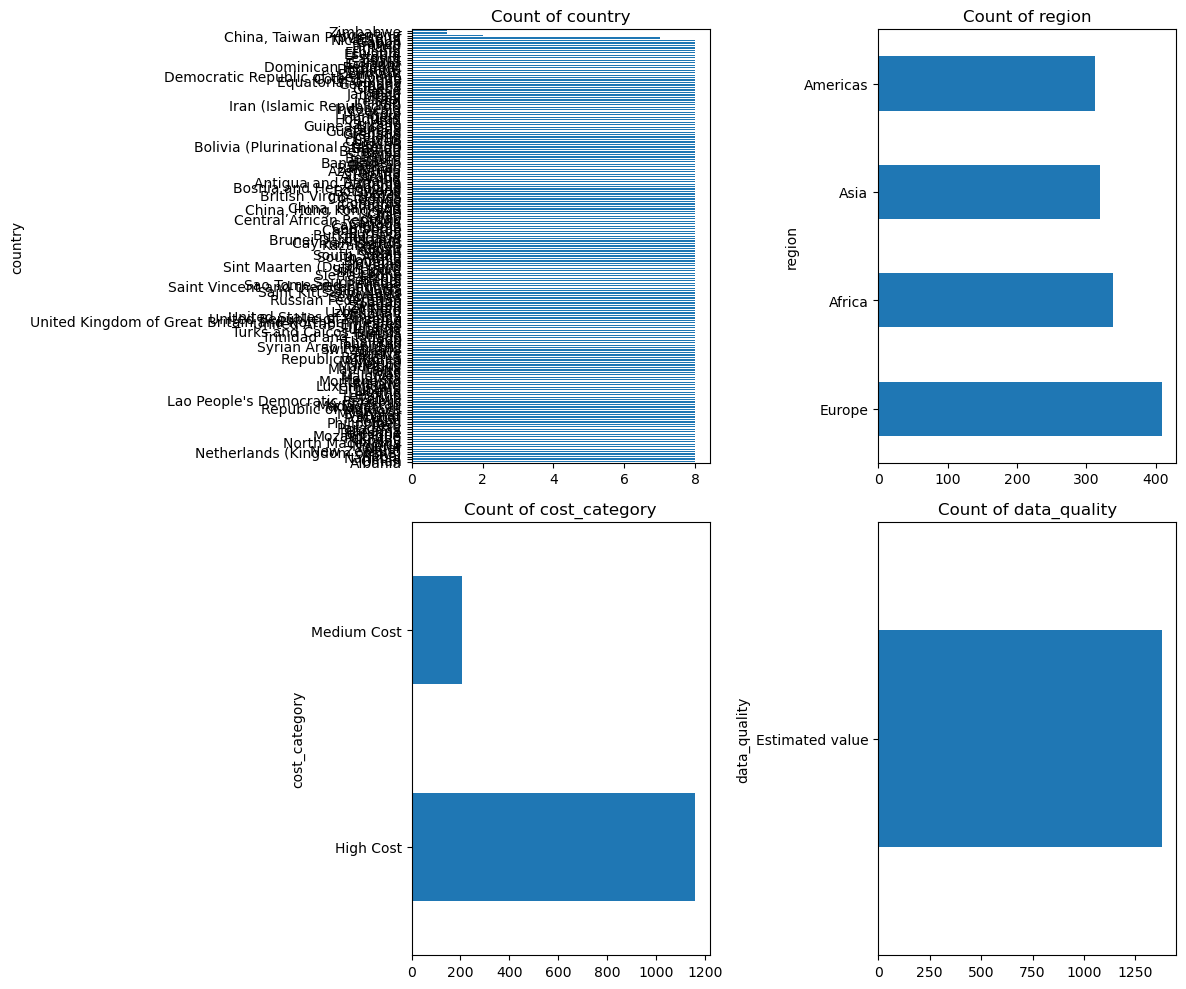

In [21]:
cat_cols = len(categorical_cols)
cols = 2
rows = (cat_cols // cols) + (cat_cols % cols)

fig, axes = plt.subplots(rows, cols, figsize=(12, 5*rows))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    data[col].value_counts().plot(
        kind="barh",   # horizontal bar
        ax=axes[i]
    )
    axes[i].set_title(f"Count of {col}")

# Remove empty subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()
